In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

# data
df = pd.read_csv("./Datasets/global_sales_data/market_fact.csv")

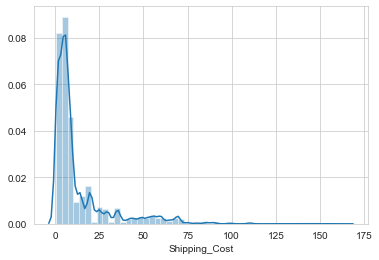

In [4]:
# simple density plot
sns.distplot(df['Shipping_Cost'])
plt.show()

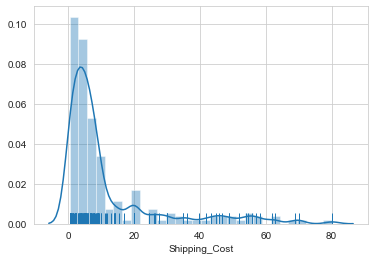

In [7]:
# rug = True
# plotting only a few points since rug takes a long while
sns.distplot(df['Shipping_Cost'][:200], rug=True)
plt.show()

In [ ]:
sns.distplot(df['Sales'], hist=False)
plt.show()